In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images/255
test_images = test_images/255

In [9]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.5069 - accuracy: 0.8205
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3595 - accuracy: 0.8695
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3256 - accuracy: 0.8809
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3007 - accuracy: 0.8881
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2822 - accuracy: 0.8952
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2680 - accuracy: 0.9000
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2532 - accuracy: 0.9050
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2431 - accuracy: 0.9092
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2326 - accuracy: 0.9122
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2249 - accuracy: 0.9148

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(test_acc)

313/313 - 1s - loss: 0.3207 - accuracy: 0.8868 - 1s/epoch - 4ms/step
0.8867999911308289


In [12]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [24]:
predictions[1]

array([2.6658452e-05, 1.5875255e-12, 9.9795508e-01, 5.5933658e-09,
       2.0007782e-03, 1.4733267e-12, 1.7465574e-05, 1.7950681e-14,
       1.7783529e-10, 1.9097380e-12], dtype=float32)

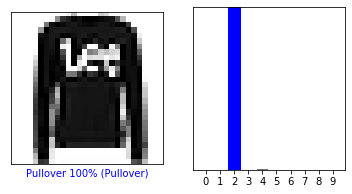

In [25]:
i=1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

1/1 [==============================] - 0s 35ms/step
[[3.2268377e-07 1.0401485e-05 1.7374668e-06 2.2792381e-06 3.1189921e-07
  2.7100989e-03 6.4158462e-07 2.9638493e-02 1.7141668e-08 9.6763569e-01]]


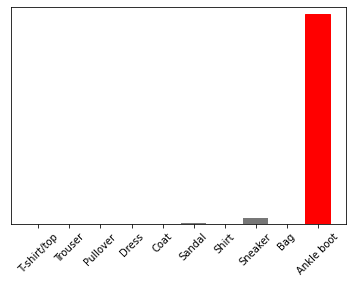

In [31]:
img = test_images[0]
img = (np.expand_dims(img, 0))

predictions_single = probability_model.predict(img)
print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [32]:
np.argmax(predictions_single[0])

9